# Max Error: La Métrica que Revela el Peor Escenario de tu Modelo

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)

print("=== MAX ERROR: ANÁLISIS COMPLETO ===\n")


=== MAX ERROR: ANÁLISIS COMPLETO ===



In [4]:
# 1. Generación de datos con outliers controlados
def create_data_with_outliers(n_samples=500, outlier_fraction=0.05):
    """
    Crea un dataset con outliers controlados para demostrar Max Error
    """
    X, y = make_regression(n_samples=n_samples, n_features=5, n_informative=3, 
                           noise=5, random_state=42)
    n_outliers = int(n_samples * outlier_fraction)
    outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
    
    outlier_magnitude = np.std(y) * 3
    y[outlier_indices] += np.random.choice([-1, 1], n_outliers) * outlier_magnitude
    
    return X, y, outlier_indices

# Crear datos
X, y, true_outliers = create_data_with_outliers()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("1. DATOS GENERADOS")
print("-" * 30)
print(f"Tamaño entrenamiento: {len(X_train)}")
print(f"Tamaño prueba: {len(X_test)}")
print(f"Rango de y: [{y.min():.2f}, {y.max():.2f}]")
print(f"Desviación estándar de y: {np.std(y):.2f}")


1. DATOS GENERADOS
------------------------------
Tamaño entrenamiento: 350
Tamaño prueba: 150
Rango de y: [-533.88, 505.62]
Desviación estándar de y: 130.38


In [6]:
# 2. ENTRENAMIENTO DE MODELOS
print("\n2. ENTRENAMIENTO DE MODELOS")
print("-" * 35)

# Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42, max_depth=15)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)



2. ENTRENAMIENTO DE MODELOS
-----------------------------------


In [8]:
# 3. COMPARACIÓN DE MÉTRICAS
print("3. COMPARACIÓN DE MÉTRICAS")
print("-" * 35)

models = {
    'Regresión Lineal': lr_pred,
    'Random Forest': rf_pred,
    'Decision Tree': dt_pred
}

results = []

for name, predictions in models.items():
    max_err = max_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    
    results.append({
        'Modelo': name,
        'Max Error': max_err,
        'MAE': mae,
        'RMSE': rmse,
        'Max/MAE Ratio': max_err / mae
    })
    
    print(f"{name}:")
    print(f"  Max Error: {max_err:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  Ratio Max/MAE: {max_err/mae:.2f}x\n")


3. COMPARACIÓN DE MÉTRICAS
-----------------------------------
Regresión Lineal:
  Max Error: 328.59
  MAE: 57.00
  RMSE: 131.24
  Ratio Max/MAE: 5.76x

Random Forest:
  Max Error: 357.33
  MAE: 64.39
  RMSE: 131.65
  Ratio Max/MAE: 5.55x

Decision Tree:
  Max Error: 437.52
  MAE: 70.95
  RMSE: 134.98
  Ratio Max/MAE: 6.17x



In [10]:
# 4. IMPLEMENTACIÓN MANUAL
def max_error_manual(y_true, y_pred):
    """
    Implementación manual del Max Error con detalle.
    """
    errors = np.abs(y_true - y_pred)
    max_error_value = np.max(errors)
    max_error_index = np.argmax(errors)
    return max_error_value, max_error_index, errors

print("4. ANÁLISIS DETALLADO DEL PEOR CASO")
print("-" * 40)

for name, predictions in models.items():
    max_err, worst_idx, all_errors = max_error_manual(y_test, predictions)
    print(f"{name}:")
    print(f"  Peor predicción índice: {worst_idx}")
    print(f"  Valor real: {y_test[worst_idx]:.2f}")
    print(f"  Predicción: {predictions[worst_idx]:.2f}")
    print(f"  Error absoluto: {max_err:.2f}")
    print(f"  Percentil 99 error: {np.percentile(all_errors, 99):.2f}\n")


4. ANÁLISIS DETALLADO DEL PEOR CASO
----------------------------------------
Regresión Lineal:
  Peor predicción índice: 11
  Valor real: -368.87
  Predicción: -40.28
  Error absoluto: 328.59
  Percentil 99 error: 328.00

Random Forest:
  Peor predicción índice: 11
  Valor real: -368.87
  Predicción: -11.53
  Error absoluto: 357.33
  Percentil 99 error: 336.60

Decision Tree:
  Peor predicción índice: 11
  Valor real: -368.87
  Predicción: 68.65
  Error absoluto: 437.52
  Percentil 99 error: 351.08



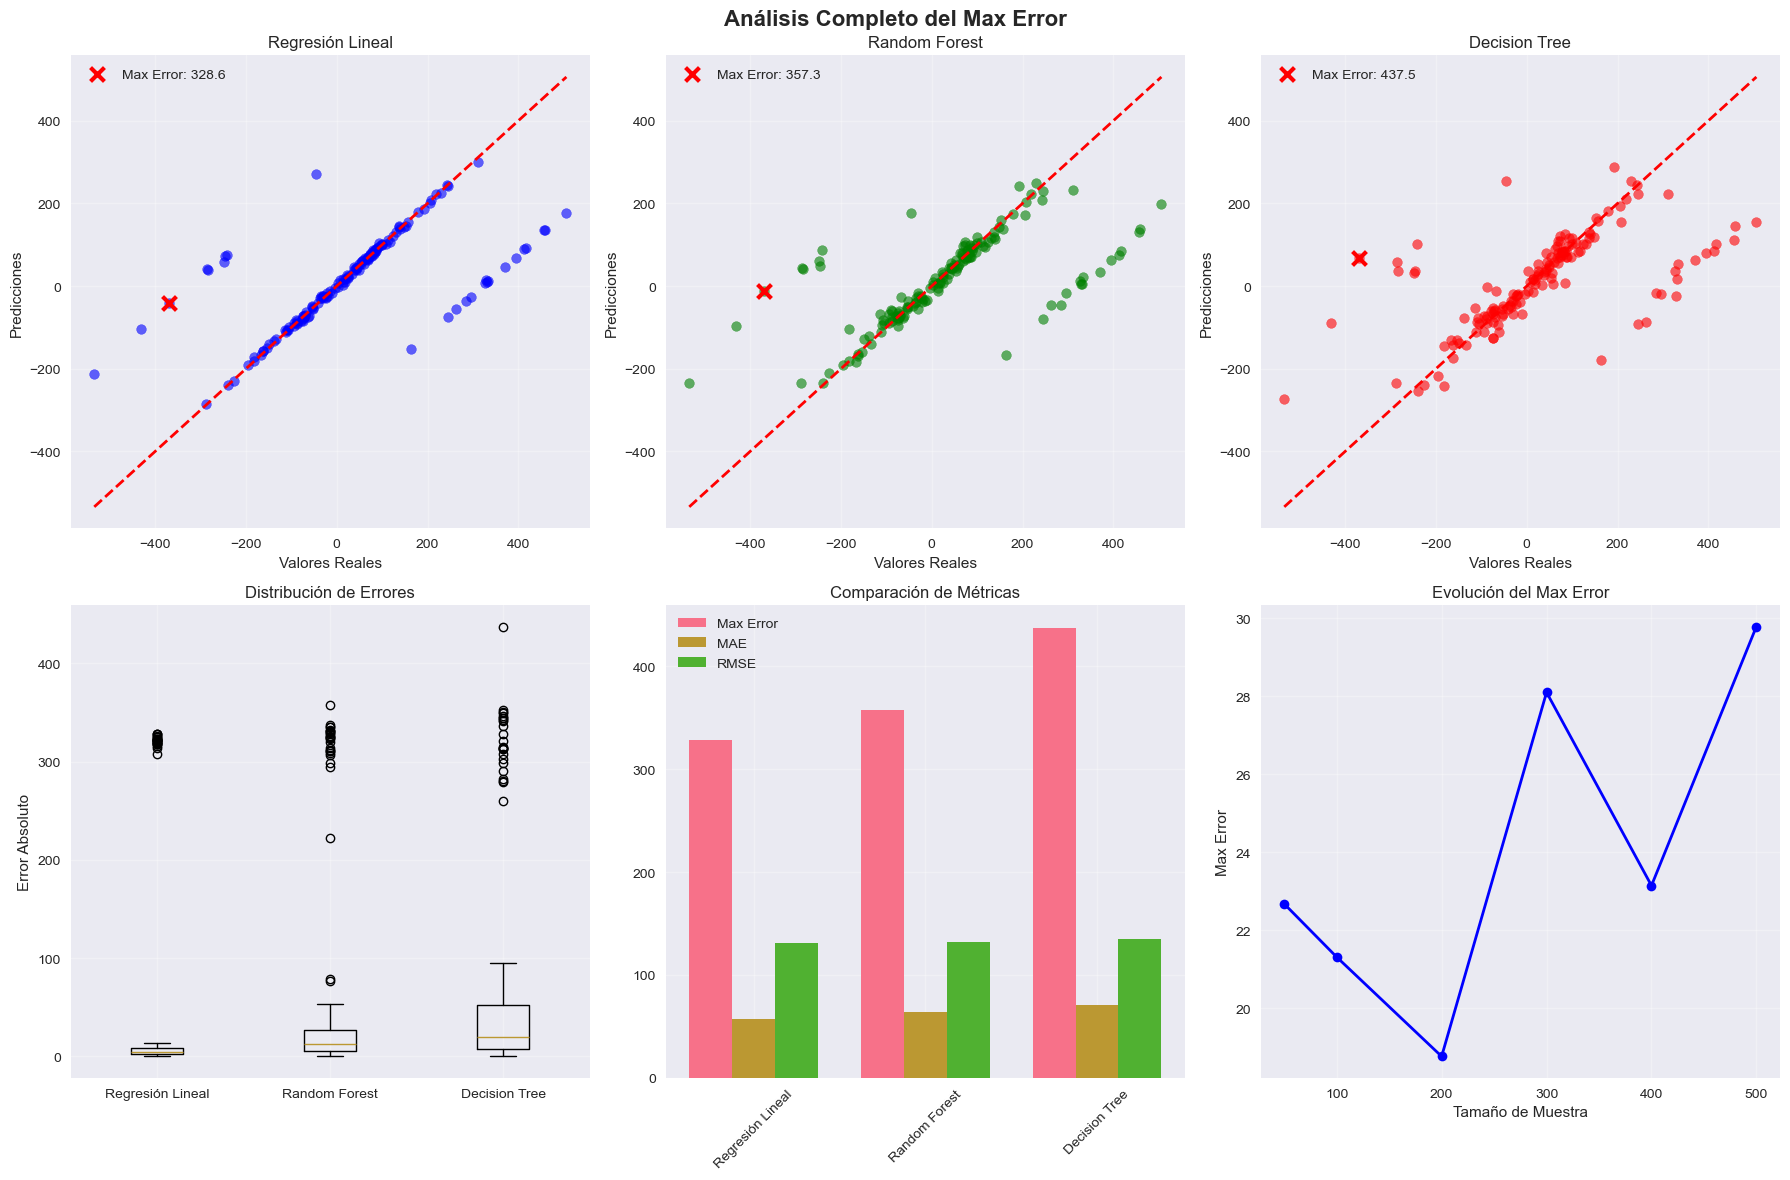

In [20]:
# 5. VISUALIZACIONES
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis Completo del Max Error', fontsize=16, fontweight='bold')

model_colors = ['blue', 'green', 'red']
model_list = list(models.keys())

# Gráficos de dispersión
for i, (name, pred) in enumerate(models.items()):
    axes[0, i].scatter(y_test, pred, alpha=0.6, color=model_colors[i])
    axes[0, i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    max_err, worst_idx, _ = max_error_manual(y_test, pred)
    axes[0, i].scatter(y_test[worst_idx], pred[worst_idx], color='red', s=100, marker='x', linewidth=3, label=f'Max Error: {max_err:.1f}')
    axes[0, i].set_title(name)
    axes[0, i].set_xlabel('Valores Reales')
    axes[0, i].set_ylabel('Predicciones')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)

# Boxplot de errores
axes[1, 0].boxplot([np.abs(y_test - pred) for pred in models.values()], tick_labels=model_list)
axes[1, 0].set_ylabel('Error Absoluto')
axes[1, 0].set_title('Distribución de Errores')
axes[1, 0].grid(True, alpha=0.3)

# Comparación de métricas
x = np.arange(len(model_list))
width = 0.25
max_errors = [max_error(y_test, pred) for pred in models.values()]
maes = [mean_absolute_error(y_test, pred) for pred in models.values()]
rmses = [np.sqrt(mean_squared_error(y_test, pred)) for pred in models.values()]

axes[1, 1].bar(x - width, max_errors, width, label='Max Error')
axes[1, 1].bar(x, maes, width, label='MAE')
axes[1, 1].bar(x + width, rmses, width, label='RMSE')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(model_list, rotation=45)
axes[1, 1].set_title('Comparación de Métricas')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Evolución del Max Error con el tamaño de muestra
sample_sizes = [50, 100, 200, 300, 400, 500]
max_errors_evolution = []

for size in sample_sizes:
    X_temp, y_temp = make_regression(n_samples=size, n_features=5, noise=10, random_state=42)
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
        X_temp, y_temp, test_size=0.3, random_state=42)
    model_temp = LinearRegression().fit(X_train_temp, y_train_temp)
    pred_temp = model_temp.predict(X_test_temp)
    max_errors_evolution.append(max_error(y_test_temp, pred_temp))

axes[1, 2].plot(sample_sizes, max_errors_evolution, 'bo-', linewidth=2)
axes[1, 2].set_xlabel('Tamaño de Muestra')
axes[1, 2].set_ylabel('Max Error')
axes[1, 2].set_title('Evolución del Max Error')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [14]:
# 6. ANÁLISIS DE SENSIBILIDAD A OUTLIERS
print("6. ANÁLISIS DE SENSIBILIDAD A OUTLIERS")
print("-" * 45)

X_clean, y_clean = make_regression(n_samples=500, n_features=5, noise=5, random_state=42)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

lr_clean = LinearRegression().fit(X_train_clean, y_train_clean)
pred_clean = lr_clean.predict(X_test_clean)

max_err_clean = max_error(y_test_clean, pred_clean)
mae_clean = mean_absolute_error(y_test_clean, pred_clean)
max_err_outliers = max_error(y_test, lr_pred)
mae_outliers = mean_absolute_error(y_test, lr_pred)

print(f"DATOS LIMPIOS:  Max Error: {max_err_clean:.2f} | MAE: {mae_clean:.2f}")
print(f"CON OUTLIERS:   Max Error: {max_err_outliers:.2f} | MAE: {mae_outliers:.2f}")
print(f"Incremento en Max Error: {((max_err_outliers/max_err_clean - 1)*100):.1f}%")
print(f"Incremento en MAE: {((mae_outliers/mae_clean - 1)*100):.1f}%")


6. ANÁLISIS DE SENSIBILIDAD A OUTLIERS
---------------------------------------------
DATOS LIMPIOS:  Max Error: 14.90 | MAE: 4.13
CON OUTLIERS:   Max Error: 328.59 | MAE: 57.00
Incremento en Max Error: 2106.0%
Incremento en MAE: 1281.8%


In [16]:
# 7. CASO PRÁCTICO: SISTEMA DE PRECIOS
print("\n7. CASO PRÁCTICO: SISTEMA DE PRECIOS")
print("-" * 45)

n_properties = 1000
area = np.random.normal(150, 50, n_properties)
bedrooms = np.random.poisson(3, n_properties) + 1
location_factor = np.random.uniform(0.5, 2.0, n_properties)

base_price = (area * 1000 + bedrooms * 10000) * location_factor
noise = np.random.normal(0, 5000, n_properties)
extreme_cases = np.random.choice(n_properties, 10, replace=False)
extreme_noise = np.random.choice([-50000, 50000], 10)

final_price = base_price + noise
final_price[extreme_cases] += extreme_noise

X_properties = np.column_stack([area, bedrooms, location_factor])
X_train_prop, X_test_prop, y_train_prop, y_test_prop = train_test_split(X_properties, final_price, test_size=0.3, random_state=42)

price_model = RandomForestRegressor(n_estimators=100, random_state=42)
price_model.fit(X_train_prop, y_train_prop)
price_pred = price_model.predict(X_test_prop)

max_err_price = max_error(y_test_prop, price_pred)
mae_price = mean_absolute_error(y_test_prop, price_pred)

print(f"SISTEMA DE PRECIOS:")
print(f"  Max Error: ${max_err_price:,.0f}")
print(f"  MAE: ${mae_price:,.0f}")
print(f"  Max Error (% del precio medio): {(max_err_price/np.mean(y_test_prop)*100):.1f}%")

_, worst_idx, _ = max_error_manual(y_test_prop, price_pred)
print(f"\nPROPIEDAD CON PEOR PREDICCIÓN:")
print(f"  Área: {X_test_prop[worst_idx, 0]:.0f} m²")
print(f"  Habitaciones: {X_test_prop[worst_idx, 1]:.0f}")
print(f"  Ubicación: {X_test_prop[worst_idx, 2]:.2f}")
print(f"  Precio real: ${y_test_prop[worst_idx]:,.0f}")
print(f"  Precio predicho: ${price_pred[worst_idx]:,.0f}")



7. CASO PRÁCTICO: SISTEMA DE PRECIOS
---------------------------------------------
SISTEMA DE PRECIOS:
  Max Error: $108,141
  MAE: $10,620
  Max Error (% del precio medio): 43.9%

PROPIEDAD CON PEOR PREDICCIÓN:
  Área: 242 m²
  Habitaciones: 6
  Ubicación: 1.95
  Precio real: $637,517
  Precio predicho: $529,376


In [18]:
print("\n8. CONCLUSIONES Y RECOMENDACIONES")
print("-" * 45)
print("- Max Error es esencial para identificar casos extremos")
print("- Debe usarse junto con MAE/RMSE para una evaluación completa")
print("- Crítico en contextos donde los errores extremos son costosos")
print("- Útil para establecer límites superiores aceptables")
print("- Ayuda a detectar outliers y anomalías relevantes")



8. CONCLUSIONES Y RECOMENDACIONES
---------------------------------------------
✓ Max Error es esencial para identificar casos extremos
✓ Debe usarse junto con MAE/RMSE para una evaluación completa
✓ Crítico en contextos donde los errores extremos son costosos
✓ Útil para establecer límites superiores aceptables
✓ Ayuda a detectar outliers y anomalías relevantes
